In [118]:
%run jupyterQ.ipynb
%run gates.ipynb
%run states.ipynb
%run coherence.ipynb

# Generalized Werner's state
\begin{equation}
\rho_{w,a} = (1-w)\frac{\mathbb{I}_{4}}{4}+w|\psi\rangle\langle\psi|,
\end{equation}
with $|\psi\rangle=\sqrt{a}|0\rangle+\sqrt{1-a}|1\rangle$.

In [121]:
w, a = symbols('w a',real=True,positive=True)
def werner_a(w,a):
    psi = sqrt(a)*tp(cb(2,0),cb(2,0)) + sqrt(1-a)*tp(cb(2,1),cb(2,1))#; psi
    return (1-w)*id(4)/4+w*proj(psi)

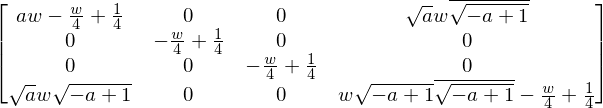

In [122]:
werner_a(w,a)

## $l_{1}$-norm coherence-predictability duality relation

In [29]:
Cl1_Waw=coh_l1(4,werner_a(w,a)); simplify(Cl1_Waw)

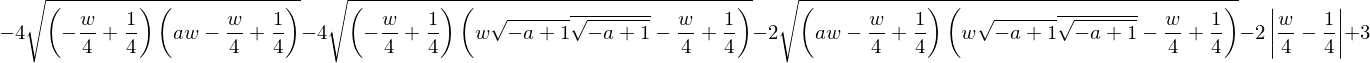

In [31]:
Pl1_Waw = predict_l1(4,werner_a(w,a)); Pl1_Waw

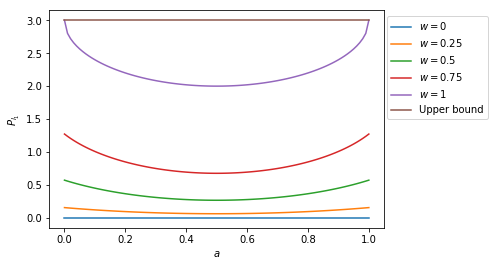

In [108]:
a = np.arange(0,1.01,0.01); da = len(a); ub = np.zeros(da)
pl1w0 = np.zeros(da); pl1w025 = np.zeros(da); pl1w05 = np.zeros(da); pl1w075 = np.zeros(da); pl1w1 = np.zeros(da)
for j in range(0,da):
    w = 0; pl1w0[j] = predict_l1(4,werner_a(w,a[j]))
    w = 0.25; pl1w025[j] = predict_l1(4,werner_a(w,a[j]))
    w = 0.5; pl1w05[j] = predict_l1(4,werner_a(w,a[j]))
    w = 0.75; pl1w075[j] = predict_l1(4,werner_a(w,a[j]))
    w = 1; pl1w1[j] = predict_l1(4,werner_a(w,a[j]))
    ub[j] = 3
plt.plot(a,pl1w0); plt.plot(a,pl1w025); plt.plot(a,pl1w05); plt.plot(a,pl1w075); plt.plot(a,pl1w1); plt.plot(a,ub)
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{l_{1}}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

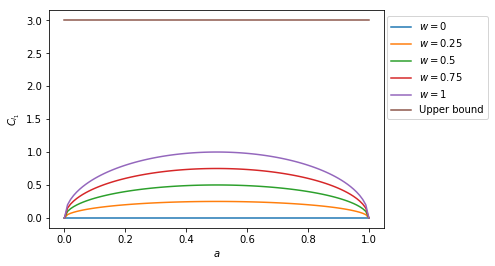

In [109]:
a = np.arange(0,1.01,0.01); da = len(a); ub = np.zeros(da)
cl1w0 = np.zeros(da); cl1w025 = np.zeros(da); cl1w05 = np.zeros(da); cl1w075 = np.zeros(da); cl1w1 = np.zeros(da)
for j in range(0,da):
    w = 0; cl1w0[j] = coh_l1(4,werner_a(w,a[j]))
    w = 0.25; cl1w025[j] = coh_l1(4,werner_a(w,a[j]))
    w = 0.5; cl1w05[j] = coh_l1(4,werner_a(w,a[j]))
    w = 0.75; cl1w075[j] = coh_l1(4,werner_a(w,a[j]))
    w = 1; cl1w1[j] = coh_l1(4,werner_a(w,a[j]))
    ub[j] = 3
plt.plot(a,cl1w0); plt.plot(a,cl1w025); plt.plot(a,cl1w05); plt.plot(a,cl1w075); plt.plot(a,cl1w1); plt.plot(a,ub)
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{l_{1}}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

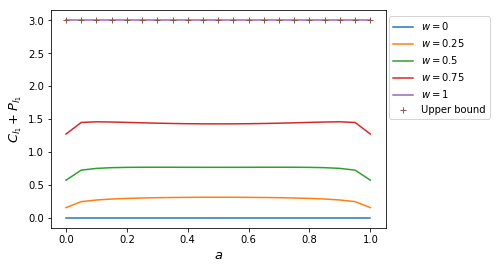

In [144]:
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
cpl1w0 = np.zeros(da); cpl1w025 = np.zeros(da); cpl1w05 = np.zeros(da); cpl1w075 = np.zeros(da); cpl1w1 = np.zeros(da)
for j in range(0,da):
    w = 0; cpl1w0[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 0.25; cpl1w025[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 0.5; cpl1w05[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 0.75; cpl1w075[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 1; cpl1w1[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    ub[j] = 3
plt.plot(a,cpl1w0); plt.plot(a,cpl1w025); plt.plot(a,cpl1w05); plt.plot(a,cpl1w075); plt.plot(a,cpl1w1)
plt.plot(a,ub,'+')
plt.xlabel(r'$a$',fontsize=13); plt.ylabel(r'$C_{l_{1}}+P_{l_{1}}$',fontsize=13)
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

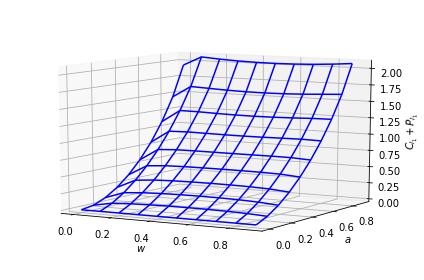

In [94]:
w = np.arange(0,1,0.1); a = np.arange(0,1,0.1); dw = len(w); da = len(a); CpP = np.zeros((dw,da))
for j in range(0,dw):
    for k in range(0,da):
        CpP[j,k] = coh_l1(4,werner_a(w[j],a[k])) + predict_l1(4,werner_a(w[j],a[k]))
from mpl_toolkits import mplot3d
X, Y = np.meshgrid(w, a)
Z = CpP
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_xlabel(r'$w$'); ax.set_ylabel(r'$a$'); ax.set_zlabel(r'$C_{l_{1}}+P_{l_{1}}$')
ax.view_init(10,-60); fig.tight_layout()
plt.show()

## Wygner-Yanase coherence-predictability duality relation

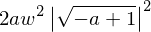

In [123]:
Chs_Waw=coh_hs(4,werner_a(w,a)); simplify(Chs_Waw)

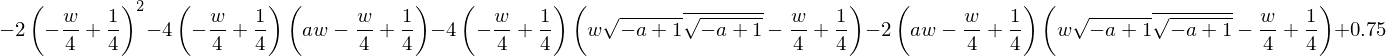

In [125]:
Phsl_Waw = predict_hs_l(4,werner_a(w,a)); Phsl_Waw

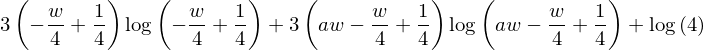

In [126]:
Phsvn_Waw = predict_hs_vn(4,werner_a(w,a)); Phsvn_Waw

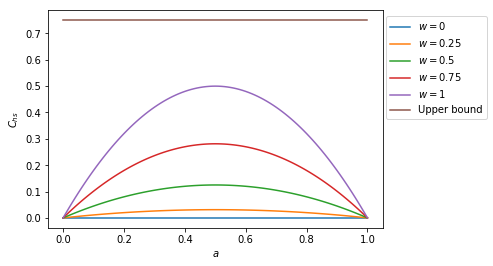

In [134]:
a = np.arange(0,1.01,0.01); da = len(a); ub = np.zeros(da)
cw0 = np.zeros(da); cw025 = np.zeros(da); cw05 = np.zeros(da); cw075 = np.zeros(da); cw1 = np.zeros(da)
for j in range(0,da):
    w = 0; cw0[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.25; cw025[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.5; cw05[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.75; cw075[j] = coh_hs(4,werner_a(w,a[j]))
    w = 1; cw1[j] = coh_hs(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
plt.plot(a,cw0); plt.plot(a,cw025); plt.plot(a,cw05); plt.plot(a,cw075); plt.plot(a,cw1); plt.plot(a,ub)
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

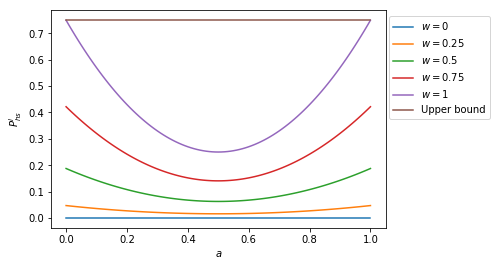

In [131]:
a = np.arange(0,1.01,0.01); da = len(a); ub = np.zeros(da)
pw0 = np.zeros(da); pw025 = np.zeros(da); pw05 = np.zeros(da); pw075 = np.zeros(da); pw1 = np.zeros(da)
for j in range(0,da):
    w = 0; pw0[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 0.25; pw025[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 0.5; pw05[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 0.75; pw075[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 1; pw1[j] = predict_hs_l(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
plt.plot(a,pw0); plt.plot(a,pw025); plt.plot(a,pw05); plt.plot(a,pw075); plt.plot(a,pw1); plt.plot(a,ub)
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{hs}^{l}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

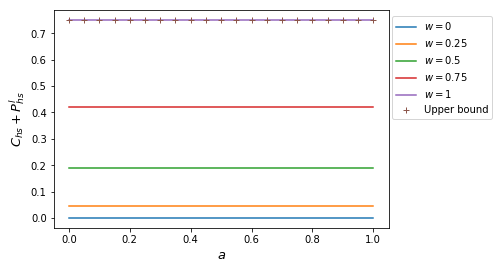

In [145]:
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
cw0 = np.zeros(da); cw025 = np.zeros(da); cw05 = np.zeros(da); cw075 = np.zeros(da); cw1 = np.zeros(da)
for j in range(0,da):
    w = 0; cw0[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.25; cw025[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.5; cw05[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.75; cw075[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 1; cw1[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
plt.plot(a,cw0); plt.plot(a,cw025); plt.plot(a,cw05); plt.plot(a,cw075); plt.plot(a,cw1); plt.plot(a,ub,'+')
plt.xlabel(r'$a$',fontsize=13); plt.ylabel(r'$C_{hs}+P_{hs}^{l}$',fontsize=13)
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

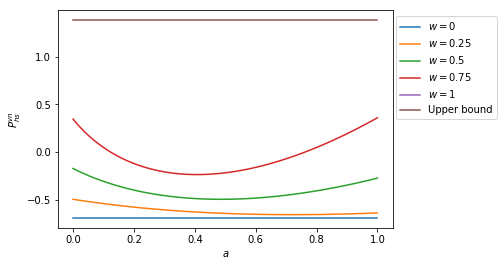

In [130]:
a = np.arange(0,1.01,0.01); da = len(a); ub = np.zeros(da)
pw0 = np.zeros(da); pw025 = np.zeros(da); pw05 = np.zeros(da); pw075 = np.zeros(da); pw1 = np.zeros(da)
for j in range(0,da):
    w = 0; pw0[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.25; pw025[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.5; pw05[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.75; pw075[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 1; pw1[j] = predict_hs_vn(4,werner_a(w,a[j]))
    ub[j] = ln(4)
plt.plot(a,pw0); plt.plot(a,pw025); plt.plot(a,pw05); plt.plot(a,pw075); plt.plot(a,pw1); plt.plot(a,ub)
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{hs}^{vn}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

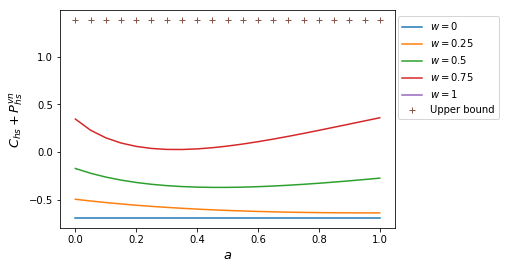

In [143]:
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
cw0 = np.zeros(da); cw025 = np.zeros(da); cw05 = np.zeros(da); cw075 = np.zeros(da); cw1 = np.zeros(da)
for j in range(0,da):
    w = 0; cw0[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.25; cw025[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.5; cw05[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.75; cw075[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 1; cw1[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    ub[j] = ln(4)
plt.plot(a,cw0); plt.plot(a,cw025); plt.plot(a,cw05); plt.plot(a,cw075); plt.plot(a,cw1); plt.plot(a,ub,'+')
plt.xlabel(r'$a$',fontsize=13); plt.ylabel(r'$C_{hs}+P_{hs}^{vn}$',fontsize=13)
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.show()

# Outros cálculos

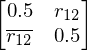

In [13]:
#x,y = symbols('x y', Real = True)
r12 = symbols('r12')
A = Matrix([[1/2,r12],[conjugate(r12),1/2]])
A

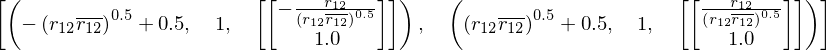

In [14]:
A.eigenvects()

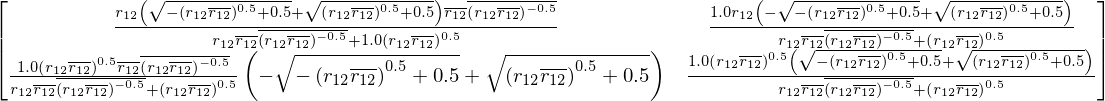

In [16]:
B = mat_sqrt(2,A)
simplify(B)

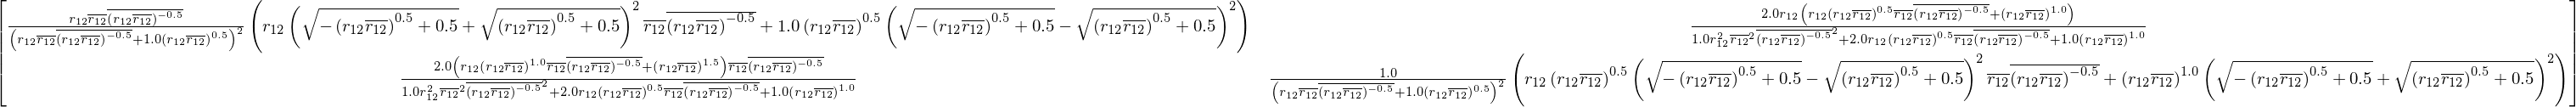

In [17]:
simplify(B*B)

In [18]:
def f(x,y):
    return (1+log(sqrt(x)))/sqrt(x) - (1+log(sqrt(y)))/sqrt(y)

In [25]:
x,y = symbols('x y')
x = 0
delt = 0.01
while x < 0.99:
    x += delt
    y = 0
    while y < x:
        y += delt
        if f(x,y) < 0:
        #if x > y:
            print(f(x,y))